In [23]:
# En este notebook se utilizará el algoritomo de SVM para clasificación del dataset clásico IRIS
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

In [24]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [25]:
X = iris.data[:, :2]
Y = iris.target

In [26]:
# Se buscan máximo y mínimos para la representación gráfica
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max/x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

In [27]:
# Se eligen los parámetros y se prueba con un kernel lineal
C = 1.0
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

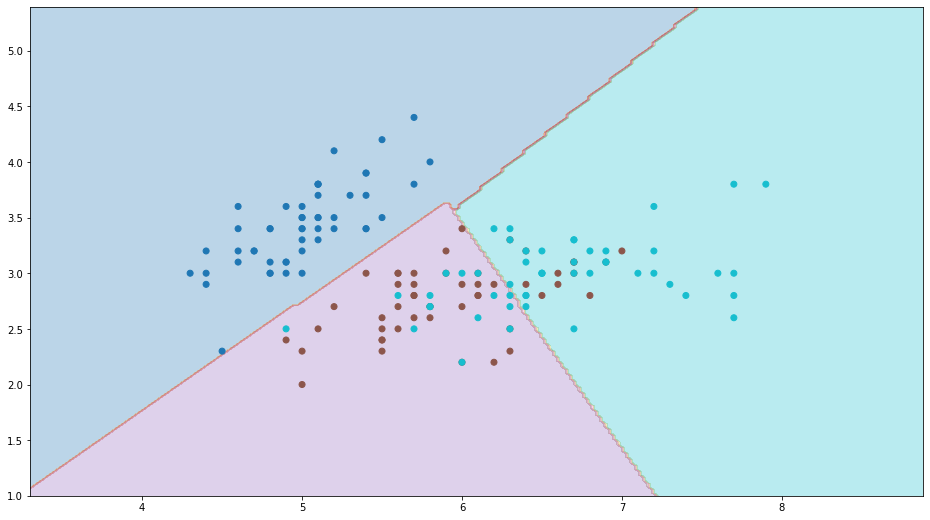

In [28]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)

In [29]:
# Se prueba con un kernel radial
C = 1.0
svc = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

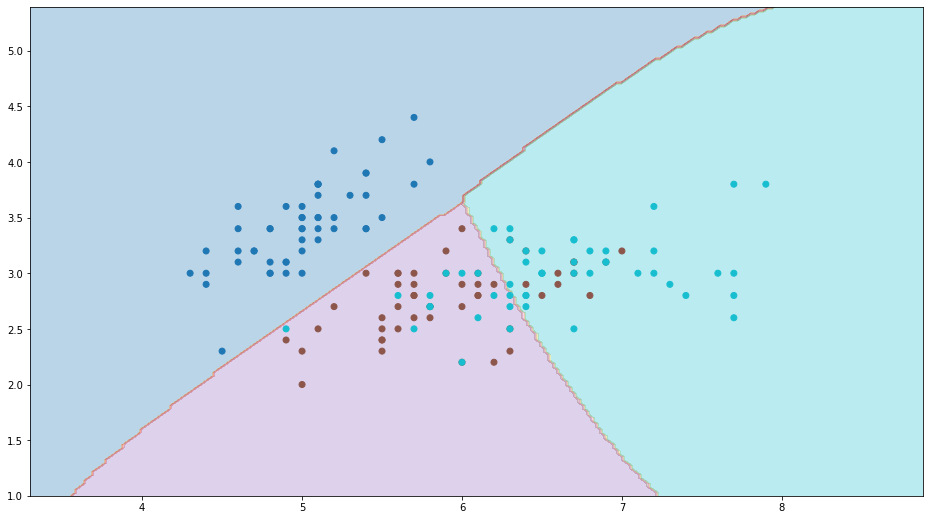

In [30]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)

In [31]:
# Se prueba con un kernel polinomial
C = 1.0
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

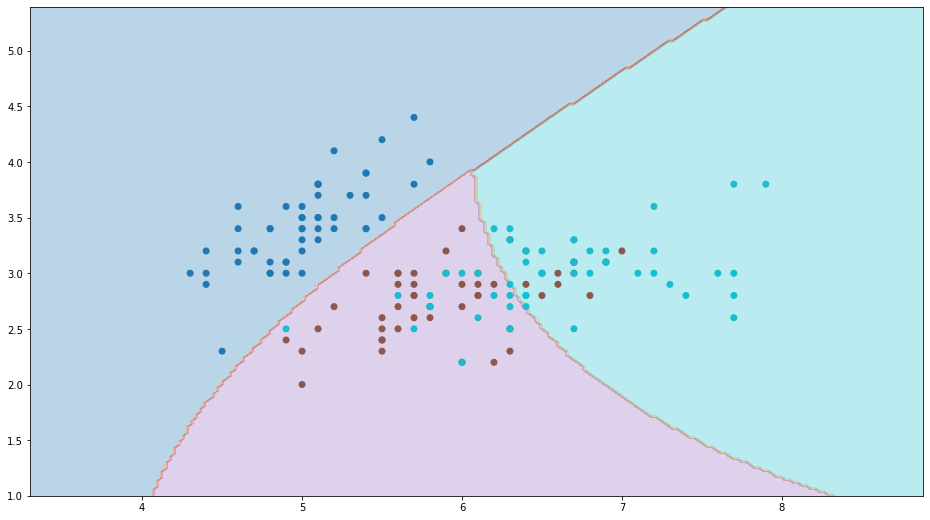

In [32]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)

In [33]:
# Tras esta primera aproximación, se procede a dividir el dataset en train y test y se buscará el mejor algoritmo y los mejores parámetros de C y gamma (solo para kernel radial) mediante GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [34]:
X,Y = shuffle(X,Y, random_state=0)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [36]:
parameters = [
    {
        "kernel":["rbf", "poly", "linear"],
        "gamma":[1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
        "C":[1,10,100,1000]
    },
    {
        "kernel":["linear"],
        "C":[1,10,100,1000]
    }
]

In [37]:
clf = GridSearchCV(svm.SVC(decision_function_shape="ovr"), param_grid=parameters, cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf', 'poly', 'linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [38]:
# Estos son los mejores parámetros que se han obtenido
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [39]:
clf.cv_results_

{'mean_fit_time': array([3.07855606e-03, 2.57744789e-03, 1.82313919e-03, 2.59871483e-03,
        2.15291977e-03, 1.31082535e-03, 2.30431557e-03, 1.99747086e-03,
        1.23176575e-03, 2.68859863e-03, 2.10967064e-03, 1.30205154e-03,
        1.57008171e-03, 2.78396606e-03, 3.34229469e-03, 1.85623169e-03,
        1.76278114e-02, 1.49698257e-03, 2.56991386e-03, 2.35815048e-03,
        1.76515579e-03, 2.36673355e-03, 2.13780403e-03, 1.39856339e-03,
        1.67908669e-03, 1.80721283e-03, 1.58066750e-03, 1.44658089e-03,
        2.80871391e-03, 1.44219398e-03, 1.52988434e-03, 1.63662910e-02,
        3.50623131e-03, 6.80222511e-03, 2.46015644e-01, 1.76219940e-03,
        4.93083000e-03, 2.23107338e-03, 3.12047005e-03, 3.45883369e-03,
        2.15158463e-03, 4.99424934e-03, 2.23894119e-03, 1.85413361e-03,
        2.59981155e-03, 3.41749191e-03, 2.79122353e-02, 6.87675476e-03,
        1.81283951e-03, 1.67319584e-01, 4.98633385e-03, 2.47936249e-03,
        1.18922315e+00, 2.48742104e-03, 2.03146

In [40]:
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]
for m, s, p in zip(means, stds, params):
    print("{:.3f} (+/-{:.3f}) para {}".format(m, 2*s, p))

0.747 (+/-0.124) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.587 (+/-0.150) para {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.773 (+/-0.098) para {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.587 (+/-0.150) para {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.773 (+/-0.098) para {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.580 (+/-0.137) para {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.773 (+/-0.098) para {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
0.807 (+/-0.129) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.767 (+/-0.094) para {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.773 (+/-0.098) para {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.787 (+/-0.124) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.773 (+/-0.088) para {'C': 1, 'gamma': 0.2, 'kernel': 'poly'}
0.773 (+/-0.098) para {'C': 1, 'gamma': 0.2, 'kernel': 'linear'}
0.780 (+/-0.116) para {'C': 1, '

In [41]:
y_pred = clf.predict(X_test)

In [42]:
print(classification_report(Y_test,y_pred, target_names=["setosa", "versicolor", "virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



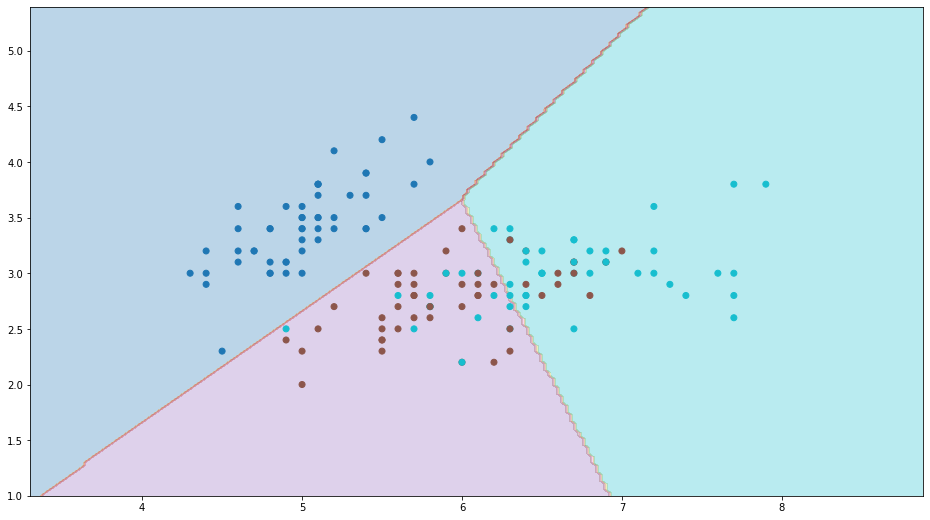

In [43]:
C = clf.best_params_["C"]
svc = svm.SVC(kernel=clf.best_params_["kernel"], C=C, gamma=clf.best_params_["gamma"], decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)